# Sentiment analysis with Random forest 
<p> Part 4 / 4 predict new reviews </p>

In [7]:
%matplotlib inline

# Import the pandas package
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import json
import codecs
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords # Import the stop word list

## Hyperparams 

In [8]:
test_datafile = "/mnt/basket/processingData/data/testData.tsv"
word2vec_feature_list = "/mnt/basket/processingData/volatile/imdb_data_features.npy"
forest_classifier = "/mnt/basket/processingData/volatile/imbd_random_forest_classifier.joblib"
word2vec_vocabulary = "/mnt/basket/processingData/volatile/imdb_data_vocab.json"
clean_test_reviews = []
stopword_vocabular = "english"

## Load data

In [9]:
# Restore random_forest_classifier
forest = joblib.load(forest_classifier)

# Load the test dataset   
test_dataset = pd.read_csv(test_datafile, header=0, delimiter="\t", quoting=3 )

# Restore vocabulary
with codecs.open(word2vec_vocabulary, 'r', encoding='utf-8') as f:
    vocab = json.load(f)

In [10]:
"""
  Restore vectorizer, wird eigentlich nicht benoetigt. 
  Ein neuer Vectorizer mit dem zuvor gespeicherten (selben) Vokabular reicht.
  vectorizer = joblib.load(word2vec_vectorizer)
"""

# Restore vectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             vocabulary = vocab,   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

## Prediction for test dataset

#### Clean and extract reviews
</p> The reviews for the test dataset needs to be cleaned.</p>

In [11]:
# Convert a raw review to a string of words
def preprocess_review( raw_review ):
    # 1. Remove HTML
    #
    non_html = BeautifulSoup(raw_review,"html5lib").get_text()
    #
    # 1. Convert to lower case
    lowerCaseWords = non_html.lower()
    #
    # 2. Remove non-letters
    letters_only = re.sub("[^a-z]", " ", lowerCaseWords)
    #
    # 3. Split into individual words
    words = letters_only.split()
    #
    # 4. searching a set is faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words(stopword_vocabular))
    #
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space
    return str(( " ".join( meaningful_words ))) # str() converts from UNICODE to ASCII

In [12]:
# Loop over each review; create an index i that goes from 0 to the length of the movie review list
num_reviews = test_dataset["review"].size
for i in xrange( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of clean reviews
    clean_test_reviews.append( preprocess_review( test_dataset["review"][i] ) )
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print "Review %d of %d\n" % ( i+1, num_reviews )

Review 1000 of 25001

Review 2000 of 25001

Review 3000 of 25001

Review 4000 of 25001

Review 5000 of 25001

Review 6000 of 25001

Review 7000 of 25001

Review 8000 of 25001

Review 9000 of 25001

Review 10000 of 25001

Review 11000 of 25001

Review 12000 of 25001

Review 13000 of 25001

Review 14000 of 25001

Review 15000 of 25001

Review 16000 of 25001

Review 17000 of 25001

Review 18000 of 25001

Review 19000 of 25001

Review 20000 of 25001

Review 21000 of 25001

Review 22000 of 25001

Review 23000 of 25001

Review 24000 of 25001

Review 25000 of 25001



#### Create vector representation
<p>Extract token counts out of raw text documents using the vocabulary fitted with fit or the one provided to the constructor. </p>

<p>  The variable "vectorizer" in the code above, used for initialisation the "vocabulary" created by the "Bag of words and word2vec" step in inotebook "02_bag_of_words". Now the individual words in the test dataset (different from the train dataset which was used to create the word2vec representations) are mapped to vector representations created in previous steps from the train dataset. </p>


In [13]:
# Create bag of words
test_data_features = vectorizer.transform(clean_test_reviews)
# convert to a numpy array
test_data_features = test_data_features.toarray()

print "example test_dataset vector: " , test_data_features[0]

example test_dataset vector:  [0 0 0 ..., 0 0 0]


#### Make sentiment label predictions

In [14]:
# Use the random forest to make sentiment label predictions
computed_predictions = forest.predict(test_data_features)

#### show distribution of sentiment predictions

In [20]:
# Copy the results to a pandas dataframe with an "id" column and a "sentiment" column
output = pd.DataFrame( data={"id":test_dataset["id"], "sentiment":computed_predictions} )
print output[:10]

           id  sentiment
0    "1111_1"          1
1  "12311_10"          1
2    "8348_2"          0
3    "5828_4"          1
4    "7186_2"          1
5   "12128_7"          1
6    "2913_8"          1
7    "4396_1"          0
8     "395_2"          1
9   "10616_1"          0


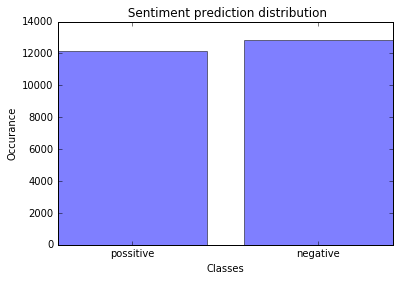

In [25]:
results = [0,0]

# split in correct prediction and wrong predictions
for item in output["sentiment"]:
    if(item ==  1 ):
        results[0] = results[0]+1 # correct prediction
    else:
        results[1] = results[1]+1 # wrong prediction

# plot
_classes = ['possitive','negative']
y_pos = np.arange(len(_classes))
plt.bar(y_pos, results, align='center', alpha=0.5)
plt.xticks(y_pos, _classes)
plt.ylabel('Occurance')
plt.xlabel('Classes')
plt.title(' Sentiment prediction distribution')
plt.show()

## Prediction for new entered reviews

#### Clean and extract reviews
<p> Clean the manual review <p>

In [26]:
# Manual entered review
entered_review = "The movie was boring and stupid"

# Create an empty list and append the clean reviews one by one
clean_test_reviews = []

print "Cleaning and parsing the test set movie reviews...\n"
clean_review = preprocess_review( entered_review )
clean_test_reviews.append( clean_review )

Cleaning and parsing the test set movie reviews...



#### Create vector representation

In [27]:
# Create bag of words
test_data_features = vectorizer.transform(clean_test_reviews)
# convert to a numpy array
test_data_features = test_data_features.toarray()

print "example test_dataset vector: " , test_data_features[0]

example test_dataset vector:  [0 0 0 ..., 0 0 0]


#### Make sentiment label predictions

In [28]:
# Use the random forest to make sentiment label predictions
computed_predictions = forest.predict(test_data_features)

#### Compare computed predictions against real sentiment

In [15]:
if computed_predictions[0] == 0 :
    print "[%i] %s : %s" % (computed_predictions[0] , "nagative" , entered_review )
else :
    print "[%i] %s : %s" % (computed_predictions[0] , "possitive" , entered_review) 

[1] possitive : Die Verbindung ist zu langsam
